In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [21]:
plt.style.use('seaborn')

## Generate Random Data

In [25]:
X, y = make_classification(n_samples=10000, n_features=20, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.90], flip_y=0, random_state=4)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, y_train, test_size=0.5)

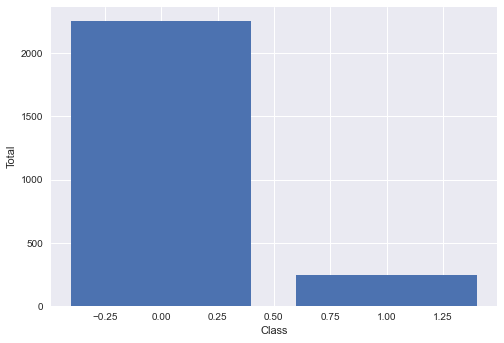

In [31]:
plt.bar(np.unique(y_train),[np.sum(y_train == 0), np.sum(y_train == 1)])

# The following commands add labels to our figure.
plt.xlabel('Class')
plt.ylabel('Total')

plt.show()

## Build Network

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [33]:
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [34]:
keras_model = build_model()

In [35]:
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)

Epoch 1/5
25/25 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.7424
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.9020
Epoch 3/5
25/25 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.9020
Epoch 4/5
25/25 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.9020
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.9036


In [36]:
prediction_keras = keras_model.predict(X_test)

In [42]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction_keras)
roc_auc_keras = auc(fpr_keras, tpr_keras)
print(f"ROC AUC score: {roc_auc_keras:.3f}")

ROC AUC score: 0.920


## Plot ROC

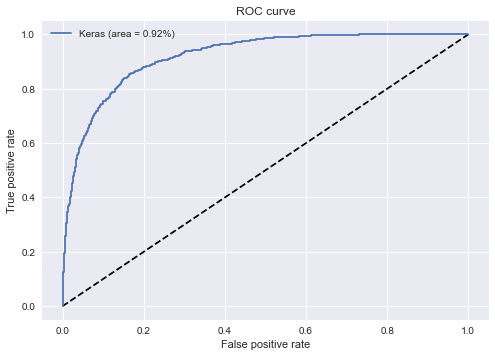

In [43]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.2f}%)'.format(roc_auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.2f%})'.format(auc_rf)) # plot more than one classifier result
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

---